In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [2]:
dataset=pd.read_csv("./g.csv",index_col="Date",parse_dates=True)

In [3]:
dataset.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  326.796783  334.409424  326.511505  333.038025  333.038025   
2012-01-04  332.847839  335.460449  330.640656  334.474487  334.474487   
2012-01-05  331.396393  332.317322  328.443451  329.834839  329.834839   
2012-01-06  329.904907  330.330322  325.220215  325.335327  325.335327   
2012-01-09  323.573578  323.823822  310.925934  311.541534  311.541534   

              Volume  
Date                  
2012-01-03   7345647  
2012-01-04   5722272  
2012-01-05   6559234  
2012-01-06   5380414  
2012-01-09  11633555

In [4]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


<AxesSubplot:xlabel='Date'>

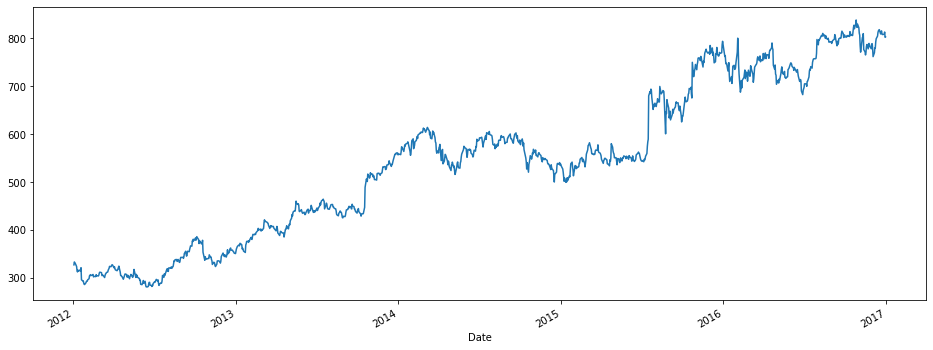

In [6]:
dataset["Open"].plot(figsize=(16,6))

In [7]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [8]:
dataset.rolling(7).mean().head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03         NaN         NaN         NaN         NaN         NaN   
2012-01-04         NaN         NaN         NaN         NaN         NaN   
2012-01-05         NaN         NaN         NaN         NaN         NaN   
2012-01-06         NaN         NaN         NaN         NaN         NaN   
2012-01-09         NaN         NaN         NaN         NaN         NaN   
2012-01-10         NaN         NaN         NaN         NaN         NaN   
2012-01-11  324.538823  326.938368  320.196629  322.771345  322.771345   
2012-01-12  322.985844  324.417271  318.346924  320.213789  320.213789   
2012-01-13  320.213789  321.321320  315.518380  317.118548  317.118548   
2012-01-17  318.058062  319.034031  313.334054  314.942801  314.942801   
2012-01-18  315.732880  317.175031  311.355647  313.719434  313.719434   
2012-01-19  315.338915  316.745318  312.087093  314.942801  314.942801   
2012-01-20  312.534681  313.685115  309.569576  312.286573  312.286573   
2012-01-23  309.853428  310.772919  306.855434  309.395107  309.395107   
2012-01-24  306.643075  307.540401  303.387678  305.912340  305.912340   
2012-01-25  303.157445  304.091239  299.478054  301.944087  301.944087   
2012-01-26  298.867440  299.979985  295.107252  297.619760  297.619760   
2012-01-27  294.874163  296.141859  291.332764  293.835262  293.835262   
2012-01-30  290.373945  291.781067  287.181471  289.410836  289.410836   
2012-01-31  289.835549  291.280566  286.713143  288.990413  288.990413   

                  Volume  
Date                      
2012-01-03           NaN  
2012-01-04           NaN  
2012-01-05           NaN  
2012-01-06           NaN  
2012-01-09           NaN  
2012-01-10           NaN  
2012-01-11  7.174104e+06  
2012-01-12  6.659962e+06  
2012-01-13  6.501064e+06  
2012-01-17  6.108999e+06  
2012-01-18  6.128637e+06  
2012-01-19  6.266413e+06  
2012-01-20  8.030561e+06  
2012-01-23  8.319672e+06  
2012-01-24  8.656649e+06  
2012-01-25  9.421712e+06  
2012-01-26  9.797593e+06  
2012-01-27  1.004186e+07  
2012-01-30  8.907341e+06  
2012-01-31  6.500065e+06

<AxesSubplot:xlabel='Date'>

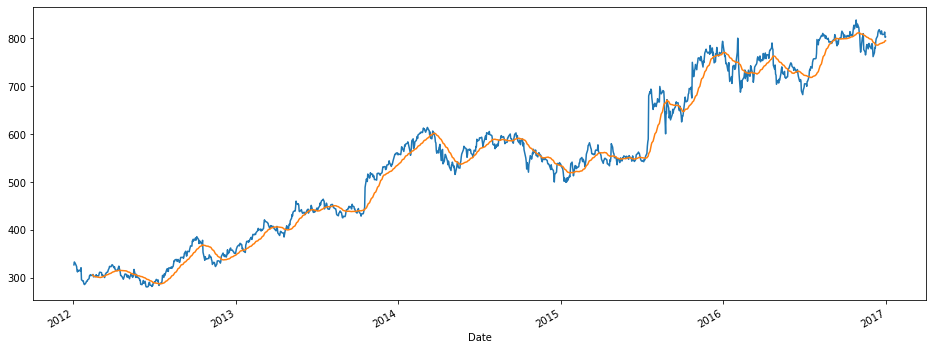

In [9]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

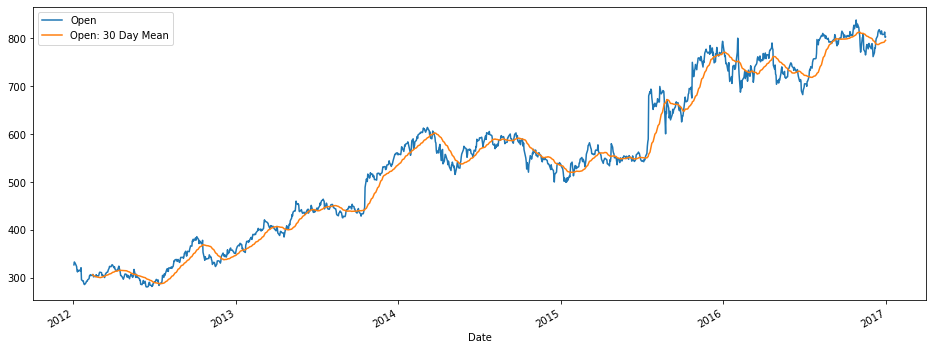

In [10]:
dataset['Open: 30 Day Mean']=dataset["Open"].rolling(window=30).mean()
dataset[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))

In [11]:
train=dataset['Open']
train=pd.DataFrame(train)

In [12]:
dataset.isna().any()

Open                 False
High                 False
Low                  False
Close                False
Adj Close            False
Volume               False
Open: 30 Day Mean     True
dtype: bool

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train)

In [14]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [16]:
#regressor
r=Sequential()

In [17]:

r.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
r.add(LSTM(units=50))
r.add(Dense(1))



In [55]:
r.compile(optimizer='adam', loss= 'mean_squared_error')

r.fit(x_train,y_train,epochs=10,batch_size=1, verbose=2)

Epoch 1/10
1198/1198 - 69s - loss: 5.1842e-04
Epoch 2/10
1198/1198 - 64s - loss: 5.6084e-04
Epoch 3/10
1198/1198 - 63s - loss: 4.9034e-04
Epoch 4/10
1198/1198 - 60s - loss: 5.0182e-04
Epoch 5/10
1198/1198 - 64s - loss: 4.2877e-04
Epoch 6/10
1198/1198 - 64s - loss: 4.4447e-04
Epoch 7/10
1198/1198 - 64s - loss: 4.5059e-04
Epoch 8/10
1198/1198 - 63s - loss: 4.6698e-04
Epoch 9/10
1198/1198 - 64s - loss: 4.4888e-04
Epoch 10/10
1198/1198 - 63s - loss: 4.7822e-04


In [56]:
test=pd.read_csv('./gogle.csv',index_col="Date",parse_dates=True)

In [57]:
real_stock=test.iloc[:,0:1].values
print(test.iloc[:,0:1])

                   Open
Date                   
2017-01-03   800.619995
2017-01-04   809.890015
2017-01-05   807.500000
2017-01-06   814.989990
2017-01-09   826.369995
...                 ...
2017-12-22  1070.000000
2017-12-26  1068.640015
2017-12-27  1066.599976
2017-12-28  1062.250000
2017-12-29  1055.489990

[251 rows x 1 columns]


In [58]:
test.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  800.619995  811.440002  796.890015  808.010010  808.010010   
2017-01-04  809.890015  813.429993  804.109985  807.770020  807.770020   
2017-01-05  807.500000  813.739990  805.919983  813.020020  813.020020   
2017-01-06  814.989990  828.960022  811.500000  825.210022  825.210022   
2017-01-09  826.369995  830.429993  821.619995  827.179993  827.179993   

             Volume  
Date                 
2017-01-03  1959000  
2017-01-04  1515300  
2017-01-05  1340500  
2017-01-06  2017100  
2017-01-09  1408900

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [60]:
test["Volume"]=test["Volume"].astype(float)

In [61]:
test_set=test['Open']
test_set=pd.DataFrame(test_set)

In [62]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [63]:
dataset_total=pd.concat((dataset['Open'],test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

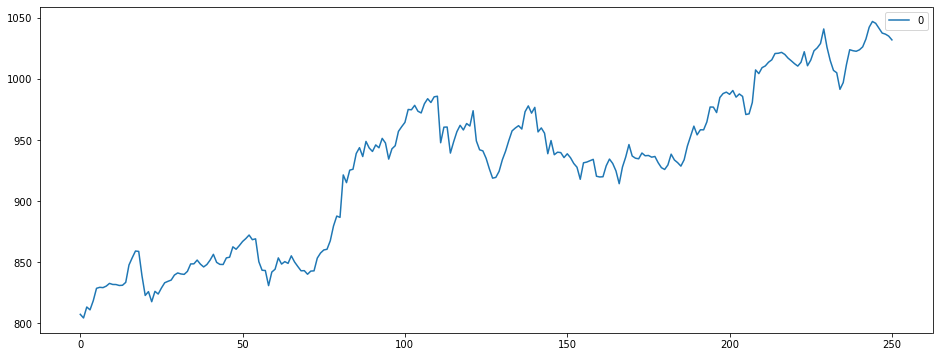

In [64]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()
predicted_stock.plot(figsize=(16,6))

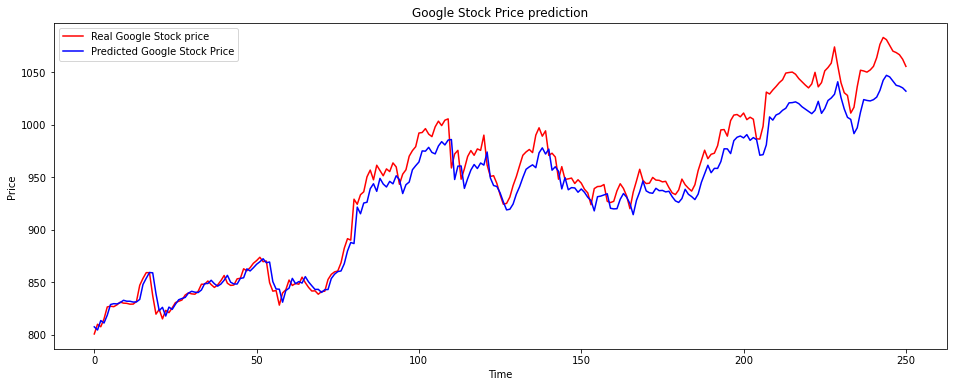

In [65]:
plt.figure(figsize=(16,6))
plt.plot(real_stock,color='red', label='Real Google Stock price')
plt.plot(predicted_stock,color='blue', label="Predicted Google Stock Price")
plt.title("Google Stock Price prediction")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
test.reset_index(drop=True, inplace=True)
test["Pred"]=predicted_stock
test[["Close","Pred"]].head(20)

Close        Pred
0   808.010010  807.399963
1   807.770020  804.418091
2   813.020020  813.390747
3   825.210022  811.066162
4   827.179993  818.542664
5   826.010010  828.683716
6   829.859985  829.488037
7   829.530029  829.250549
8   830.940002  830.482605
9   827.460022  832.716187
10  829.020020  831.827576
11  824.369995  831.774536
12  828.169983  830.998291
13  844.429993  831.171204
14  849.530029  833.536682
15  858.450012  847.752075
16  856.979980  853.660339
17  845.030029  859.182434
18  823.830017  858.863770
19  820.190002  839.009766